In [166]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../script/')
import palade #palade.plotでパレード図を描画
%matplotlib inline

In [167]:
#air_reserve = pd.read_csv("../data/train_air_reserve.csv")
air_reserve = pd.read_csv("../data/air_reserve.csv")

In [168]:
#air_visit = pd.read_csv("../data/train_air_visit.csv")
air_visit = pd.read_csv("../data/air_visit_data.csv")

In [169]:
format_train = pd.read_csv("../data/features_format.csv")

In [170]:
format_test = pd.read_csv("../data/test_data.csv")

In [171]:
data_format = pd.concat([format_train,format_test[["air_store_id","visit_date","visitors"]]])

In [172]:
air_reserve["reserve_datetime"] = pd.to_datetime(air_reserve["reserve_datetime"])
air_reserve["visit_datetime"] = pd.to_datetime(air_reserve["visit_datetime"])

In [173]:
air_visit["visit_date"] = pd.to_datetime(air_visit["visit_date"])

In [174]:
air_reserve.head(2)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3


In [175]:
air_reserve["reserve_year"] = air_reserve["reserve_datetime"].dt.year
air_reserve["reserve_month"] = air_reserve["reserve_datetime"].dt.month
air_reserve["reserve_day"] = air_reserve["reserve_datetime"].dt.day
air_reserve["reserve_time"] = air_reserve["reserve_datetime"].dt.time
air_reserve["reserve_ymd"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)+"-"+air_reserve["reserve_day"].astype(str)
air_reserve["reserve_ymd"] = pd.to_datetime(air_reserve["reserve_ymd"])
air_reserve["reserve_ym"] = air_reserve["reserve_year"].astype(str)+"-"+air_reserve["reserve_month"].astype(str)
air_reserve["reserve_ym"] = pd.to_datetime(air_reserve["reserve_ym"])

In [176]:
air_reserve["visit_year"] = air_reserve["visit_datetime"].dt.year
air_reserve["visit_month"] = air_reserve["visit_datetime"].dt.month
air_reserve["visit_day"] = air_reserve["visit_datetime"].dt.day
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time
air_reserve["visit_ymd"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)+"-"+air_reserve["visit_day"].astype(str)
air_reserve["visit_ymd"] = pd.to_datetime(air_reserve["visit_ymd"])
air_reserve["visit_ym"] = air_reserve["visit_year"].astype(str)+"-"+air_reserve["visit_month"].astype(str)
air_reserve["visit_ym"] = pd.to_datetime(air_reserve["visit_ym"])

In [177]:
air_visit["visit_year"] = air_visit["visit_date"].dt.year
air_visit["visit_month"] = air_visit["visit_date"].dt.month
air_visit["visit_day"] = air_visit["visit_date"].dt.day
air_visit["visit_time"] = air_visit["visit_date"].dt.time
air_visit["visit_ymd"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)+"-"+air_visit["visit_day"].astype(str)
air_visit["visit_ymd"] = pd.to_datetime(air_visit["visit_ymd"])
air_visit["visit_ym"] = air_visit["visit_year"].astype(str)+"-"+air_visit["visit_month"].astype(str)
air_visit["visit_ym"] = pd.to_datetime(air_visit["visit_ym"])

In [178]:
air_reserve["visit_weekday"] = air_reserve["visit_datetime"].dt.weekday_name

### 予約平均回数  
予約回数 / 店を開いた日数

In [179]:
a = air_reserve.groupby("air_store_id")["visit_ymd"].count().reset_index().rename(columns={"visit_ymd":"reserve_count"})

In [180]:
b = air_visit.groupby("air_store_id")["visit_date"].count().reset_index().rename(columns={"visit_date":"open_count"})

In [181]:
reserve_counts_mean = pd.merge(a,b,how="left")

In [182]:
reserve_counts_mean["reserve_mean"] = reserve_counts_mean["reserve_count"]/reserve_counts_mean["open_count"]

In [183]:
reserve_counts_mean= reserve_counts_mean[["air_store_id","reserve_mean"]]

In [184]:
#reserve_counts_mean= pd.DataFrame(air_reserve.groupby("air_store_id")["visit_datetime"].count()/439)

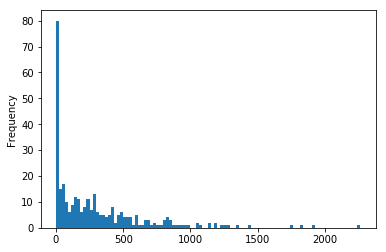

In [185]:
air_reserve.groupby("air_store_id")["visit_datetime"].count().plot.hist(bins=100)

### 予約人数の最頻値

In [186]:
air_reserve.groupby(["air_store_id","visit_weekday"])["visit_datetime"].count().head()

air_store_id          visit_weekday
air_00a91d42b08b08d9  Friday           1
                      Monday           2
                      Saturday         2
                      Thursday         1
                      Tuesday          4
Name: visit_datetime, dtype: int64

In [187]:
air_reserve.groupby(["air_store_id","reserve_ymd"])["reserve_visitors"].sum().head()

air_store_id          reserve_ymd
air_00a91d42b08b08d9  2016-10-31      2
                      2016-12-01      9
                      2016-12-08     18
                      2016-12-11      2
                      2016-12-18      4
Name: reserve_visitors, dtype: int64

In [188]:
temp = air_reserve.groupby(["air_store_id","reserve_visitors"])["visit_datetime"].count()

In [189]:
reserve_visitor_mode = pd.concat([pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[0::2]]),
          pd.Series([element for tupl in temp.groupby("air_store_id").idxmax().values for element in tupl[1::2]])],axis=1)

reserve_visitor_mode = reserve_visitor_mode.rename(columns={0:"air_store_id",1:"mode"})

In [190]:
reserve_visitor_mode.head()

,air_store_id,mode
0,air_00a91d42b08b08d9,2
1,air_0164b9927d20bcc3,2
2,air_034a3d5b40d5b1b1,2
3,air_03963426c9312048,2
4,air_04341b588bde96cd,10


### 平均訪問者数

In [191]:
visit_visitors_mean = air_visit.groupby("air_store_id")["visitors"].mean()

In [192]:
visit_visitors_mean = pd.DataFrame(visit_visitors_mean).rename(columns={"visitors":"visitors_mean"})

### 営業時間  

訪問予定時間の最大、最小?
予約

In [193]:
air_reserve["visit_time"] = air_reserve["visit_time"].astype(str).str[:2]

In [194]:
temp = air_reserve[["air_store_id","visit_time","visit_datetime"]].groupby(["air_store_id","visit_time"]).count()

In [195]:
temp.head(2)

visit_datetime
air_store_id         visit_time                
air_00a91d42b08b08d9 17                       2
                     18                       1

In [196]:
business_time = np.logical_not(pd.pivot_table(temp,index="air_store_id",columns="visit_time").isnull())*1

In [197]:
business_time.columns

MultiIndex(levels=[['visit_datetime'], ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           names=[None, 'visit_time'])

In [198]:
business_time.head()

visit_datetime                            ...           \
visit_time                       00 01 02 03 04 05 06 07 08 09 ... 14 15 16   
air_store_id                                                   ...            
air_00a91d42b08b08d9              0  0  0  0  0  0  0  0  0  0 ...  0  0  0   
air_0164b9927d20bcc3              1  1  1  0  0  0  0  0  0  0 ...  0  0  0   
air_034a3d5b40d5b1b1              0  0  0  0  0  0  0  0  0  0 ...  0  1  1   
air_03963426c9312048              0  0  0  0  0  0  0  0  0  0 ...  1  1  1   
air_04341b588bde96cd              1  0  0  0  0  0  0  0  0  0 ...  0  1  0   

                                           
visit_time           17 18 19 20 21 22 23  
air_store_id                               
air_00a91d42b08b08d9  1  1  1  1  0  0  0  
air_0164b9927d20bcc3  1  1  1  1  1  1  1  
air_034a3d5b40d5b1b1  1  1  1  1  0  0  1  
air_03963426c9312048  1  1  1  1  1  1  1  
air_04341b588bde96cd  0  1  1  1  1  1  0  

[5 rows x 24 columns]

In [199]:
business_time.columns = business_time.columns.levels[1]

In [200]:
business_time.head()

visit_time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
air_store_id,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
air_0164b9927d20bcc3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
air_034a3d5b40d5b1b1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,0,1
air_03963426c9312048,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
air_04341b588bde96cd,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [201]:
air_reserve["visit_time"] = air_reserve["visit_datetime"].dt.time

In [202]:
visit_start_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].min())
visit_start_time = visit_start_time.rename(columns={"visit_time":"start_time"})

In [203]:
visit_end_time = pd.DataFrame(air_reserve.groupby("air_store_id")["visit_time"].max())
visit_end_time = visit_end_time.rename(columns={"visit_time":"end_time"})

### 席数(最大同時予約人数?)
暫定 : 同じ時間に訪問する予定人数で最大を取得

In [204]:
temp = air_reserve.groupby(["air_store_id","visit_datetime"])["reserve_visitors"].sum()

In [205]:
temp.head(2)

air_store_id          visit_datetime     
air_00a91d42b08b08d9  2016-10-31 20:00:00    2
                      2016-12-05 19:00:00    9
Name: reserve_visitors, dtype: int64

In [206]:
temp.values

array([ 2,  9, 18, ...,  3,  6,  5])

In [207]:
reserve_seats = pd.DataFrame(temp.groupby("air_store_id").max())
reserve_seats = reserve_seats.rename(columns={"reserve_visitors":"seats"})

### 回転率

一日の来客数 /　席数

In [208]:
reserve_seats.head()#["air_store_id"]

,seats
air_store_id,
air_00a91d42b08b08d9,18
air_0164b9927d20bcc3,18
air_034a3d5b40d5b1b1,50
air_03963426c9312048,78
air_04341b588bde96cd,37


In [209]:
rotational_speed  = pd.merge(air_visit,reserve_seats,left_on="air_store_id",right_index=True)
rotational_speed["rot_speed"] = rotational_speed["visitors"]/rotational_speed["seats"]

### 予約率の算出

#### 1日の予約人数合計

In [210]:
pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index().tail(2)

,air_store_id,visit_ymd,reserve_visitors
29828,air_fea5dc9594450608,2017-05-20,6
29829,air_fee8dcf4d619598e,2017-01-09,5


In [211]:
reserve_visit_diff = pd.merge(pd.DataFrame(air_reserve.groupby(["air_store_id","visit_ymd"])["reserve_visitors"].sum()).reset_index(),air_visit,left_on=["air_store_id","visit_ymd"],right_on=["air_store_id","visit_date"] )[["air_store_id","visit_date","visitors","reserve_visitors"]]

In [212]:
reserve_visit_diff["reserve_rat"] = reserve_visit_diff["reserve_visitors"]/reserve_visit_diff["visitors"]

In [213]:
reserve_visit_diff["reserve_diff"] = reserve_visit_diff["visitors"] - reserve_visit_diff["reserve_visitors"]

### genre

In [214]:
raw_air_store_info = pd.read_csv('../data/air_store_info.csv', engine='python', encoding='UTF-8')

In [215]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().reset_index().head(9)

,air_area_name,air_genre_name,air_store_id
0,Fukuoka-ken Fukuoka-shi Daimyō,Bar/Cocktail,7
1,Fukuoka-ken Fukuoka-shi Daimyō,Cafe/Sweets,26
2,Fukuoka-ken Fukuoka-shi Daimyō,Creative cuisine,2
3,Fukuoka-ken Fukuoka-shi Daimyō,Dining bar,5
4,Fukuoka-ken Fukuoka-shi Daimyō,Italian/French,9
5,Fukuoka-ken Fukuoka-shi Daimyō,Izakaya,6
6,Fukuoka-ken Fukuoka-shi Daimyō,Japanese food,3
7,Fukuoka-ken Fukuoka-shi Daimyō,Other,3
8,Fukuoka-ken Fukuoka-shi Daimyō,Yakiniku/Korean food,3


In [216]:
genre_rank_in_area = raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().groupby("air_area_name").rank().reset_index().rename(columns={"air_store_id":"rank"})

In [217]:
raw_air_store_info.groupby(["air_area_name","air_genre_name"])["air_store_id"].count().head()#.reset_index(name="count").sort_values(["count"],ascending=False)#.head(9)

air_area_name                   air_genre_name  
Fukuoka-ken Fukuoka-shi Daimyō  Bar/Cocktail         7
                                Cafe/Sweets         26
                                Creative cuisine     2
                                Dining bar           5
                                Italian/French       9
Name: air_store_id, dtype: int64

In [218]:
a = raw_air_store_info.groupby("air_area_name")["air_genre_name"].value_counts().reset_index(name="genre_count")

In [219]:
b = raw_air_store_info.groupby("air_area_name")["air_genre_name"].count().reset_index(name = "genre_all_count")

In [220]:
genre_freq_in_area = pd.merge(a,b)
genre_freq_in_area["genre_freq_in_area"] = genre_freq_in_area["genre_count"]/genre_freq_in_area["genre_all_count"]

### 1日前の訪問人数

In [221]:
test = air_visit

In [222]:
#format_test["visit_date"] = pd.to_datetime(format_test["visit_date"])

In [223]:
data_format["visit_date"] = pd.to_datetime(data_format["visit_date"])

In [224]:
test = pd.merge(data_format,air_visit,how="left",on=["air_store_id","visit_date"]).rename(columns={"visitors_x":"visitors"})

In [225]:
test["diff1"] = test["visit_date"] + datetime.timedelta(days=1)

In [226]:
diff1_visitors = pd.merge(data_format, test[["air_store_id","visitors","diff1"]], left_on=["air_store_id","visit_date"], right_on=["air_store_id","diff1"] )

In [227]:
diff1_visitors = diff1_visitors.rename(columns={"visitors_x":"visitors","visitors_y":"diff1_visitors"})[["air_store_id","visitors","visit_date","diff1_visitors"]]

In [228]:
diff1_visitors["visit_date"] = pd.to_datetime(diff1_visitors["visit_date"])

In [229]:
diff1_visitors.tail()

,air_store_id,visitors,visit_date,diff1_visitors
391612,air_fff68b929994bfbd,6.0,2017-04-18,3.0
391613,air_fff68b929994bfbd,2.0,2017-04-19,6.0
391614,air_fff68b929994bfbd,2.0,2017-04-20,2.0
391615,air_fff68b929994bfbd,4.0,2017-04-21,2.0
391616,air_fff68b929994bfbd,5.0,2017-04-22,4.0


In [230]:
air_visit["visit_date"][0]

Timestamp('2016-01-13 00:00:00')

### 7日前の訪問人数

genreとjoin

In [231]:
test = air_visit

In [232]:
air_visit.columns

Index(['air_store_id', 'visit_date', 'visitors', 'visit_year', 'visit_month',
       'visit_day', 'visit_time', 'visit_ymd', 'visit_ym'],
      dtype='object')

In [233]:
test = pd.merge(data_format,air_visit,how="left",on=["air_store_id","visit_date"]).rename(columns={"visitors_x":"visitors"})

In [234]:
test["diff7"] = test["visit_date"] + datetime.timedelta(days=7)

In [235]:
diff7_visitors = pd.merge(data_format, test[["air_store_id","visitors","diff7"]], left_on=["air_store_id","visit_date"], right_on=["air_store_id","diff7"] ,how="left")

In [236]:
diff7_visitors.head(10)

,air_store_id,visit_date,visitors_x,visitors_y,diff7
0,air_00a91d42b08b08d9,2016-01-01,NaN,NaN,NaT
1,air_00a91d42b08b08d9,2016-01-02,NaN,NaN,NaT
2,air_00a91d42b08b08d9,2016-01-03,NaN,NaN,NaT
3,air_00a91d42b08b08d9,2016-01-04,NaN,NaN,NaT
4,air_00a91d42b08b08d9,2016-01-05,NaN,NaN,NaT
5,air_00a91d42b08b08d9,2016-01-06,NaN,NaN,NaT
6,air_00a91d42b08b08d9,2016-01-07,NaN,NaN,NaT
7,air_00a91d42b08b08d9,2016-01-08,NaN,NaN,2016-01-08
8,air_00a91d42b08b08d9,2016-01-09,NaN,NaN,2016-01-09
9,air_00a91d42b08b08d9,2016-01-10,NaN,NaN,2016-01-10


In [237]:
diff7_visitors = diff7_visitors.rename(columns={"visitors_x":"visitors","visitors_y":"diff7_visitors"})[["air_store_id","visitors","visit_date","diff7_visitors"]]

In [238]:
diff7_visitors["visit_date"] = pd.to_datetime(diff7_visitors["visit_date"])

In [239]:
diff7_visitors.columns

Index(['air_store_id', 'visitors', 'visit_date', 'diff7_visitors'], dtype='object')

In [240]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp = temp.rename(columns={0:"air_store_id"})

In [241]:
reserve_true_store_list = pd.merge(temp,raw_air_store_info)

/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


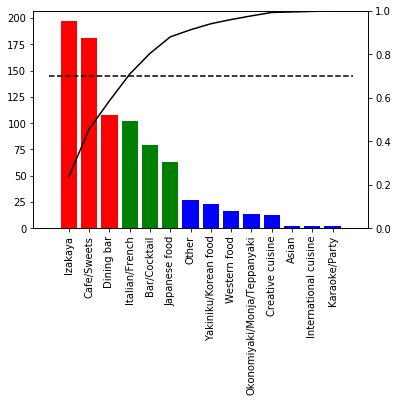

In [242]:
palade.count_plot(raw_air_store_info,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

#### genreによって予約可能店舗数に違いがあるかチェック

In [243]:
a = raw_air_store_info["air_genre_name"].value_counts().sort_index()
b = reserve_true_store_list["air_genre_name"].value_counts().sort_index()
pd.concat([a,b,(a-b)/a],axis=1)

,air_genre_name,air_genre_name,air_genre_name
Asian,2,1,0.500000
Bar/Cocktail,79,14,0.822785
Cafe/Sweets,181,20,0.889503
Creative cuisine,13,3,0.769231
Dining bar,108,46,0.574074
International cuisine,2,1,0.500000
Italian/French,102,55,0.460784
Izakaya,197,110,0.441624
Japanese food,63,29,0.539683
Karaoke/Party,2,1,0.500000


#### 2016-07-01前は316店舗分のデータしか存在しない

In [244]:
air_visit[air_visit["visit_date"] < "2016-07-01"].describe(include="all")

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym
count,47699,47699,47699.000000,47699.0,47699.000000,47699.000000,47699,47699,47699
unique,316,182,NaN,NaN,NaN,NaN,1,182,6
top,air_71903025d39a4571,2016-06-24 00:00:00,NaN,NaN,NaN,NaN,00:00:00,2016-06-24 00:00:00,2016-03-01 00:00:00
freq,182,304,NaN,NaN,NaN,NaN,47699,304,8278
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00
last,NaN,2016-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-06-30 00:00:00,2016-06-01 00:00:00
mean,NaN,NaN,21.800499,2016.0,3.564121,15.948217,NaN,NaN,NaN
std,NaN,NaN,17.086586,0.0,1.692667,8.677865,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016.0,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,9.000000,2016.0,2.000000,9.000000,NaN,NaN,NaN


In [245]:
air_visit.describe(include= "all")

,air_store_id,visit_date,visitors,visit_year,visit_month,visit_day,visit_time,visit_ymd,visit_ym
count,252108,252108,252108.000000,252108.000000,252108.000000,252108.000000,252108,252108,252108
unique,829,478,NaN,NaN,NaN,NaN,1,478,16
top,air_5c817ef28f236bdf,2017-03-17 00:00:00,NaN,NaN,NaN,NaN,00:00:00,2017-03-17 00:00:00,2017-03-01 00:00:00
freq,477,799,NaN,NaN,NaN,NaN,252108,799,22292
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,2016-01-01 00:00:00
last,NaN,2017-04-22 00:00:00,NaN,NaN,NaN,NaN,NaN,2017-04-22 00:00:00,2017-04-01 00:00:00
mean,NaN,NaN,20.973761,2016.307697,6.208200,15.591830,NaN,NaN,NaN
std,NaN,NaN,16.757007,0.461542,3.680263,8.670745,NaN,NaN,NaN
min,NaN,NaN,1.000000,2016.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,9.000000,2016.000000,3.000000,8.000000,NaN,NaN,NaN


In [246]:
temp = pd.DataFrame(air_reserve["air_store_id"].unique())
temp2 = pd.DataFrame(air_visit[air_visit["visit_date"] < "2016-07-01"]["air_store_id"].unique())

In [247]:
pd.merge(temp,temp2).head()

,0
0,air_877f79706adbfb06
1,air_db4b38ebe7a7ceff
2,air_db80363d35f10926
3,air_3bb99a1fe0583897
4,air_2b8b29ddfd35018e


/Users/ryo_ozaki/miniconda3/envs/python-basics/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


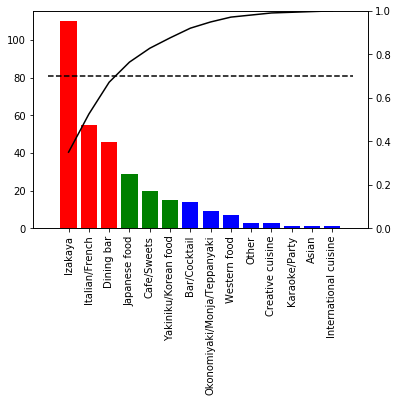

In [248]:
palade.count_plot(reserve_true_store_list,"air_genre_name",rotation=90,ABC=True,x_numbers=14,hline_cum=0.7)

In [249]:
pd.merge(air_reserve,raw_air_store_info,on="air_store_id").head()#["air_genre_name"].unique()#.groupby("air_store_id").count()#["air_genre_name"]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,reserve_year,reserve_month,reserve_day,reserve_time,reserve_ymd,reserve_ym,...,visit_month,visit_day,visit_time,visit_ymd,visit_ym,visit_weekday,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,1,19:00:00,2016-01-01,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,1,20:00:00,2016-01-01,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,2,18:00:00,2016-01-02,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,2016,1,1,16:00:00,2016-01-01,2016-01-01,...,1,2,21:00:00,2016-01-02,2016-01-01,Saturday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,2016,1,4,20:00:00,2016-01-04,2016-01-01,...,1,8,21:00:00,2016-01-08,2016-01-01,Friday,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [250]:
print(visit_start_time.shape)
visit_start_time.tail(2)

(314, 1)


,start_time
air_store_id,
air_fea5dc9594450608,02:00:00
air_fee8dcf4d619598e,19:00:00


In [251]:
print(visit_end_time.shape)
visit_end_time.tail(2)

(314, 1)


,end_time
air_store_id,
air_fea5dc9594450608,23:00:00
air_fee8dcf4d619598e,19:00:00


In [252]:
print(reserve_counts_mean.shape)
reserve_counts_mean.tail(2)

(314, 2)


,air_store_id,reserve_mean
312,air_fea5dc9594450608,0.510949
313,air_fee8dcf4d619598e,0.006944


In [253]:
reserve_visitor_mode.tail(2)

,air_store_id,mode
312,air_fea5dc9594450608,2
313,air_fee8dcf4d619598e,2


In [254]:
reserve_seats.tail(2)

,seats
air_store_id,
air_fea5dc9594450608,13
air_fee8dcf4d619598e,5


In [255]:
rotational_speed[["air_store_id","visit_date","rot_speed"]].head(2)


,air_store_id,visit_date,rot_speed
1004,air_35512c42db0868da,2016-02-25,0.166667
1005,air_35512c42db0868da,2016-02-26,1.083333


In [256]:
reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_diff"]].tail()

,air_store_id,visit_date,reserve_visitors,reserve_diff
28059,air_fea5dc9594450608,2017-04-19,2,15
28060,air_fea5dc9594450608,2017-04-20,6,17
28061,air_fea5dc9594450608,2017-04-21,10,18
28062,air_fea5dc9594450608,2017-04-22,2,12
28063,air_fee8dcf4d619598e,2017-01-09,5,12


In [257]:
print(visit_visitors_mean.shape)
visit_visitors_mean.tail(2)

(829, 1)


,visitors_mean
air_store_id,
air_ffcc2d5087e1b476,20.242798
air_fff68b929994bfbd,5.089219


In [258]:
genre_rank_in_area.tail(2)

,air_area_name,air_genre_name,rank
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,1.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,1.5


In [259]:
genre_freq_in_area.tail(2)

,air_area_name,air_genre_name,genre_count,genre_all_count,genre_freq_in_area
242,Ōsaka-fu Ōsaka-shi Ōhiraki,Cafe/Sweets,2,4,0.5
243,Ōsaka-fu Ōsaka-shi Ōhiraki,Izakaya,2,4,0.5


In [260]:
temp = pd.merge(genre_freq_in_area,genre_rank_in_area,on=["air_area_name","air_genre_name"])

In [261]:
diff_visitors=pd.merge(diff1_visitors,diff7_visitors,how="right")

In [262]:
diff_visitors[(diff_visitors["air_store_id"]=="air_00a91d42b08b08d9") & (diff_visitors["visit_date"] > "2016-07-01")].head(28)

,air_store_id,visitors,visit_date,diff1_visitors,diff7_visitors
182,air_00a91d42b08b08d9,9.0,2016-07-02,35.0,NaN
183,air_00a91d42b08b08d9,NaN,2016-07-03,9.0,NaN
184,air_00a91d42b08b08d9,20.0,2016-07-04,NaN,NaN
185,air_00a91d42b08b08d9,25.0,2016-07-05,20.0,NaN
186,air_00a91d42b08b08d9,29.0,2016-07-06,25.0,NaN
187,air_00a91d42b08b08d9,34.0,2016-07-07,29.0,NaN
188,air_00a91d42b08b08d9,42.0,2016-07-08,34.0,35.0
189,air_00a91d42b08b08d9,11.0,2016-07-09,42.0,9.0
190,air_00a91d42b08b08d9,NaN,2016-07-10,11.0,NaN
191,air_00a91d42b08b08d9,25.0,2016-07-11,NaN,20.0


In [263]:
diff_visitors.shape

(392438, 5)

In [264]:
genre_data = pd.merge(raw_air_store_info,temp)

In [265]:
reserve_visit_diff.head()

,air_store_id,visit_date,visitors,reserve_visitors,reserve_rat,reserve_diff
0,air_00a91d42b08b08d9,2016-10-31,26,2,0.076923,24
1,air_00a91d42b08b08d9,2016-12-05,33,9,0.272727,24
2,air_00a91d42b08b08d9,2016-12-14,30,18,0.600000,12
3,air_00a91d42b08b08d9,2016-12-17,17,2,0.117647,15
4,air_00a91d42b08b08d9,2016-12-20,37,4,0.108108,33


In [266]:
diff_visitors.head()

,air_store_id,visitors,visit_date,diff1_visitors,diff7_visitors
0,air_00a91d42b08b08d9,NaN,2016-01-02,NaN,NaN
1,air_00a91d42b08b08d9,NaN,2016-01-03,NaN,NaN
2,air_00a91d42b08b08d9,NaN,2016-01-04,NaN,NaN
3,air_00a91d42b08b08d9,NaN,2016-01-05,NaN,NaN
4,air_00a91d42b08b08d9,NaN,2016-01-06,NaN,NaN


In [267]:
resume = pd.merge(reserve_counts_mean,business_time,left_on="air_store_id", right_index=True)
resume = pd.merge(resume,reserve_visitor_mode,left_on="air_store_id", right_on="air_store_id")
resume = pd.merge(resume,reserve_seats,left_on="air_store_id",  right_index=True)
resume = pd.merge(resume,visit_visitors_mean,left_on="air_store_id",  right_index=True,how="right")
# resume = pd.merge(resume, diff_visitors[["air_store_id","visit_date","visitors","diff1_visitors","diff7_visitors"]], left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"],how="right")
resume = pd.merge(resume, diff_visitors[["air_store_id","visit_date","visitors","diff1_visitors","diff7_visitors"]], left_on="air_store_id",  right_on="air_store_id",how="right")
resume = pd.merge(rotational_speed[["air_store_id","visit_date","rot_speed"]],resume,left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"],how="right")
resume = pd.merge(resume,reserve_visit_diff[["air_store_id","visit_date","reserve_visitors","reserve_rat","reserve_diff"]],left_on=["air_store_id","visit_date"],  right_on=["air_store_id","visit_date"],how="left")

resume = pd.merge(resume, genre_data,on="air_store_id",how="left")
resume.shape

(392438, 45)

In [268]:
resume.head()

,air_store_id,visit_date,rot_speed,reserve_mean,00,01,02,03,04,05,...,reserve_rat,reserve_diff,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
0,air_35512c42db0868da,2016-02-25,0.166667,0.002392,0,0,0,0,0,0,...,NaN,NaN,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.56626,2,2,1.0,1.0
1,air_35512c42db0868da,2016-02-26,1.083333,0.002392,0,0,0,0,0,0,...,NaN,NaN,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.56626,2,2,1.0,1.0
2,air_35512c42db0868da,2016-02-27,0.500000,0.002392,0,0,0,0,0,0,...,2.0,-6.0,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.56626,2,2,1.0,1.0
3,air_35512c42db0868da,2016-02-28,2.500000,0.002392,0,0,0,0,0,0,...,NaN,NaN,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.56626,2,2,1.0,1.0
4,air_35512c42db0868da,2016-02-29,0.916667,0.002392,0,0,0,0,0,0,...,NaN,NaN,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.56626,2,2,1.0,1.0


In [269]:
resume["visit_date"].describe()

count                  392438
unique                    478
top       2016-12-27 00:00:00
freq                      821
first     2016-01-01 00:00:00
last      2017-04-22 00:00:00
Name: visit_date, dtype: object

In [270]:
resume.columns

Index(['air_store_id', 'visit_date', 'rot_speed', 'reserve_mean', '00', '01',
       '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'mode',
       'seats', 'visitors_mean', 'visitors', 'diff1_visitors',
       'diff7_visitors', 'reserve_visitors', 'reserve_rat', 'reserve_diff',
       'air_genre_name', 'air_area_name', 'latitude', 'longitude',
       'genre_count', 'genre_all_count', 'genre_freq_in_area', 'rank'],
      dtype='object')

In [271]:
#format1 = pd.read_csv("../data/features_format.csv")

In [272]:
#format1

In [273]:
#resume["visit_date"]= resume["visit_date"].astype(str)

In [274]:
id_unique_columns = resume[["air_store_id","reserve_mean",'00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23',"mode","seats","visitors_mean"]]

In [275]:
id_unique_columns.shape

(392438, 29)

In [276]:
id_date_unique_columns = resume[["air_store_id","visit_date","rot_speed","reserve_visitors","reserve_diff","diff1_visitors","diff7_visitors"]]

In [277]:
id_date_unique_columns["rot_speed"]

0         0.166667
1         1.083333
2         0.500000
3         2.500000
4         0.916667
5         1.416667
6         0.583333
7         1.166667
8         0.833333
9         1.416667
10        2.083333
11        0.833333
12        0.916667
13        1.083333
14        0.916667
15        1.833333
16        1.333333
17        1.166667
18        0.916667
19        0.750000
20        1.583333
21        1.000000
22        0.666667
23        1.583333
24        0.666667
25        1.666667
26        1.416667
27        1.166667
28        1.250000
29        0.916667
            ...   
392408         NaN
392409         NaN
392410         NaN
392411         NaN
392412         NaN
392413         NaN
392414         NaN
392415         NaN
392416         NaN
392417         NaN
392418         NaN
392419         NaN
392420         NaN
392421         NaN
392422         NaN
392423         NaN
392424         NaN
392425         NaN
392426         NaN
392427         NaN
392428         NaN
392429      

In [278]:
id_unique_columns.head()

,air_store_id,reserve_mean,00,01,02,03,04,05,06,07,...,17,18,19,20,21,22,23,mode,seats,visitors_mean
0,air_35512c42db0868da,0.002392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12.0,12.0,9.80622
1,air_35512c42db0868da,0.002392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12.0,12.0,9.80622
2,air_35512c42db0868da,0.002392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12.0,12.0,9.80622
3,air_35512c42db0868da,0.002392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12.0,12.0,9.80622
4,air_35512c42db0868da,0.002392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,12.0,12.0,9.80622


In [279]:
id_unique_columns.columns

Index(['air_store_id', 'reserve_mean', '00', '01', '02', '03', '04', '05',
       '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'mode', 'seats', 'visitors_mean'],
      dtype='object')

In [280]:
a = pd.merge(data_format,id_unique_columns.drop_duplicates(),on="air_store_id",how="left")

In [281]:
a.head()

,air_store_id,visit_date,visitors,reserve_mean,00,01,02,03,04,05,...,17,18,19,20,21,22,23,mode,seats,visitors_mean
0,air_00a91d42b08b08d9,2016-01-01,NaN,0.051724,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897
1,air_00a91d42b08b08d9,2016-01-02,NaN,0.051724,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897
2,air_00a91d42b08b08d9,2016-01-03,NaN,0.051724,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897
3,air_00a91d42b08b08d9,2016-01-04,NaN,0.051724,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897
4,air_00a91d42b08b08d9,2016-01-05,NaN,0.051724,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897


In [282]:
a.shape

(392438, 31)

In [283]:
id_date_unique_columns.head()

,air_store_id,visit_date,rot_speed,reserve_visitors,reserve_diff,diff1_visitors,diff7_visitors
0,air_35512c42db0868da,2016-02-25,0.166667,NaN,NaN,NaN,NaN
1,air_35512c42db0868da,2016-02-26,1.083333,NaN,NaN,2.0,NaN
2,air_35512c42db0868da,2016-02-27,0.500000,12.0,-6.0,13.0,NaN
3,air_35512c42db0868da,2016-02-28,2.500000,NaN,NaN,6.0,NaN
4,air_35512c42db0868da,2016-02-29,0.916667,NaN,NaN,30.0,NaN


In [284]:
b = pd.merge(a,id_date_unique_columns,left_on=["air_store_id","visit_date"],right_on=["air_store_id","visit_date"],how="left")

In [285]:
b[(b["air_store_id"]=="air_35512c42db0868da") & (b["visit_date"] > "2016-02-24")]

,air_store_id,visit_date,visitors,reserve_mean,00,01,02,03,04,05,...,22,23,mode,seats,visitors_mean,rot_speed,reserve_visitors,reserve_diff,diff1_visitors,diff7_visitors
67661,air_35512c42db0868da,2016-02-25,2.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,0.166667,NaN,NaN,NaN,NaN
67662,air_35512c42db0868da,2016-02-26,13.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,1.083333,NaN,NaN,2.0,NaN
67663,air_35512c42db0868da,2016-02-27,6.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,0.500000,12.0,-6.0,13.0,NaN
67664,air_35512c42db0868da,2016-02-28,30.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,2.500000,NaN,NaN,6.0,NaN
67665,air_35512c42db0868da,2016-02-29,11.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,0.916667,NaN,NaN,30.0,NaN
67666,air_35512c42db0868da,2016-03-01,17.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,1.416667,NaN,NaN,11.0,NaN
67667,air_35512c42db0868da,2016-03-02,7.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,0.583333,NaN,NaN,17.0,NaN
67668,air_35512c42db0868da,2016-03-03,14.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,1.166667,NaN,NaN,7.0,2.0
67669,air_35512c42db0868da,2016-03-04,10.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,0.833333,NaN,NaN,14.0,13.0
67670,air_35512c42db0868da,2016-03-05,17.0,0.002392,0,0,0,0,0,0,...,1,0,12.0,12.0,9.80622,1.416667,NaN,NaN,10.0,6.0


In [286]:
b["rot_speed"].count()

97333

In [287]:
c = pd.merge(b,genre_data,on="air_store_id",how="left")

In [288]:
c.shape

(392438, 44)

In [289]:
c.describe()

,visitors,reserve_mean,mode,seats,visitors_mean,rot_speed,reserve_visitors,reserve_diff,diff1_visitors,diff7_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank
count,250468.000000,150092.000000,150092.000000,150092.000000,392438.000000,97333.000000,28064.000000,28064.000000,249694.000000,245458.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000
mean,20.959308,1.194795,2.624204,37.464968,21.165778,1.561988,13.751283,12.840757,20.939194,20.945726,35.633756,137.411565,5.309379,23.900122,0.383384,3.761267
std,16.739781,2.548124,2.054717,89.992198,11.779131,2.536312,17.284799,18.581614,16.725890,16.659374,2.058635,3.641403,4.662477,20.149462,0.306000,2.674762
min,1.000000,0.002110,1.000000,1.000000,1.187500,0.001017,1.000000,-1615.000000,1.000000,1.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000
25%,9.000000,0.060811,2.000000,13.000000,11.765125,0.400000,5.000000,3.000000,9.000000,9.000000,34.695124,135.341564,2.000000,7.000000,0.153846,1.500000
50%,17.000000,0.596369,2.000000,24.000000,19.120000,0.800000,10.000000,9.000000,17.000000,17.000000,35.658068,139.684992,4.000000,19.000000,0.254902,3.000000
75%,29.000000,1.590909,2.000000,40.000000,28.616034,1.555556,18.000000,19.000000,29.000000,29.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000
max,877.000000,33.169811,20.000000,1002.000000,115.470588,114.000000,1633.000000,205.000000,877.000000,877.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000


In [290]:
c["visit_date"] = pd.to_datetime(c["visit_date"])
c["weekday"] = c["visit_date"].dt.weekday_name


In [291]:
c

,air_store_id,visit_date,visitors,reserve_mean,00,01,02,03,04,05,...,diff7_visitors,air_genre_name,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,weekday
0,air_00a91d42b08b08d9,2016-01-01,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Friday
1,air_00a91d42b08b08d9,2016-01-02,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Saturday
2,air_00a91d42b08b08d9,2016-01-03,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Sunday
3,air_00a91d42b08b08d9,2016-01-04,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Monday
4,air_00a91d42b08b08d9,2016-01-05,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Tuesday
5,air_00a91d42b08b08d9,2016-01-06,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Wednesday
6,air_00a91d42b08b08d9,2016-01-07,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Thursday
7,air_00a91d42b08b08d9,2016-01-08,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Friday
8,air_00a91d42b08b08d9,2016-01-09,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Saturday
9,air_00a91d42b08b08d9,2016-01-10,NaN,0.051724,0,0,0,0,0,0,...,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Sunday


In [292]:
c.groupby(["air_store_id","weekday"])["rot_speed"].count()

air_store_id          weekday  
air_00a91d42b08b08d9  Friday       40
                      Monday       35
                      Saturday     38
                      Sunday        1
                      Thursday     38
                      Tuesday      40
                      Wednesday    40
air_0164b9927d20bcc3  Friday       28
                      Monday       20
                      Saturday     22
                      Sunday        0
                      Thursday     26
                      Tuesday      25
                      Wednesday    28
air_0241aa3964b7f861  Friday        0
                      Monday        0
                      Saturday      0
                      Sunday        0
                      Thursday      0
                      Tuesday       0
                      Wednesday     0
air_0328696196e46f18  Friday        0
                      Monday        0
                      Saturday      0
                      Sunday        0
                  

In [293]:
c.groupby(["air_store_id","weekday"])["rot_speed"].sum()

air_store_id          weekday  
air_00a91d42b08b08d9  Friday        81.111111
                      Monday        43.666667
                      Saturday      31.611111
                      Sunday         0.111111
                      Thursday      63.055556
                      Tuesday       54.111111
                      Wednesday     62.500000
air_0164b9927d20bcc3  Friday        17.833333
                      Monday         8.333333
                      Saturday       7.833333
                      Sunday         0.000000
                      Thursday      14.222222
                      Tuesday       13.277778
                      Wednesday     15.055556
air_0241aa3964b7f861  Friday         0.000000
                      Monday         0.000000
                      Saturday       0.000000
                      Sunday         0.000000
                      Thursday       0.000000
                      Tuesday        0.000000
                      Wednesday      0.000000
ai

In [294]:
temp = (c.groupby(["air_store_id","weekday"])["rot_speed"].count()/c.groupby(["air_store_id","weekday"])["rot_speed"].sum()).replace(np.inf,0).reset_index()

In [295]:
c = c.fillna(0)

In [296]:
c = pd.merge(c,temp,on=["air_store_id","weekday"],how="left")

In [297]:
c.shape

(392438, 46)

In [298]:
c = c[['air_store_id', 'visit_date', 'visitors', 'reserve_mean', '00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'mode', 'seats',
       'visitors_mean',# 'reserve_visitors', 'reserve_diff',
        'diff7_visitors', 'air_genre_name', 'air_area_name',
       'latitude', 'longitude', 'genre_count', 'genre_all_count',
       'genre_freq_in_area', 'rank', 'weekday', "rot_speed_y"]].rename(columns={"rot_speed_y":"rot_speed"})

In [299]:
c.describe()

,visitors,reserve_mean,00,01,02,03,04,05,06,07,...,seats,visitors_mean,diff7_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,rot_speed
count,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,...,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,149276.000000
mean,13.376982,0.456962,0.108404,0.051157,0.036541,0.025579,0.015834,0.009744,0.004872,0.004872,...,14.328867,21.165778,13.100913,35.633756,137.411565,5.309379,23.900122,0.383384,3.761267,1.965209
std,16.741424,1.679417,0.310891,0.220318,0.187632,0.157875,0.124835,0.098231,0.069630,0.069630,...,58.556763,11.779131,16.624191,2.058635,3.641403,4.662477,20.149462,0.306000,2.674762,4.704166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.187500,0.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000,0.045307
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11.765125,0.000000,34.695124,135.341564,2.000000,7.000000,0.153846,1.500000,0.662031
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,19.120000,7.000000,35.658068,139.684992,4.000000,19.000000,0.254902,3.000000,1.307054
75%,21.000000,0.205729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,28.616034,21.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000,2.108108
max,877.000000,33.169811,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1002.000000,115.470588,877.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000,143.354167


In [300]:
c["rot_speed"]

0         0.493151
1         1.202109
2         9.000000
3         0.801527
4         0.739220
5         0.640000
6         0.602643
7         0.493151
8         1.202109
9         9.000000
10        0.801527
11        0.739220
12        0.640000
13        0.602643
14        0.493151
15        1.202109
16        9.000000
17        0.801527
18        0.739220
19        0.640000
20        0.602643
21        0.493151
22        1.202109
23        9.000000
24        0.801527
25        0.739220
26        0.640000
27        0.602643
28        0.493151
29        1.202109
            ...   
392408         NaN
392409         NaN
392410         NaN
392411         NaN
392412         NaN
392413         NaN
392414         NaN
392415         NaN
392416         NaN
392417         NaN
392418         NaN
392419         NaN
392420         NaN
392421         NaN
392422         NaN
392423         NaN
392424         NaN
392425         NaN
392426         NaN
392427         NaN
392428         NaN
392429      

In [301]:
#c.to_csv("../data/features_from_reserve_and_genre.csv",index=False)

## TREE系を適用するための特徴量

## まずは1週間後予測するモデルのための特徴量

In [302]:
features_for_tree = c[["air_store_id","reserve_mean",'00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23',"mode","seats","visitors_mean"]].drop_duplicates()

In [303]:
features_for_tree = features_for_tree[np.logical_not(features_for_tree.isnull().any(1))]

In [304]:
features_for_tree.head()

,air_store_id,reserve_mean,00,01,02,03,04,05,06,07,...,17,18,19,20,21,22,23,mode,seats,visitors_mean
0,air_00a91d42b08b08d9,0.051724,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,2.0,18.0,26.081897
439,air_0164b9927d20bcc3,1.026846,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,2.0,18.0,9.248322
878,air_0241aa3964b7f861,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,9.896465
1317,air_0328696196e46f18,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,7.939655
1756,air_034a3d5b40d5b1b1,0.055777,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,2.0,50.0,14.828685


In [305]:
features_reserve = c[np.logical_not(c["reserve_mean"].isnull())]

In [306]:
features_reserve = features_reserve.fillna(0)

In [307]:
features_reserve.columns

Index(['air_store_id', 'visit_date', 'visitors', 'reserve_mean', '00', '01',
       '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'mode',
       'seats', 'visitors_mean', 'diff7_visitors', 'air_genre_name',
       'air_area_name', 'latitude', 'longitude', 'genre_count',
       'genre_all_count', 'genre_freq_in_area', 'rank', 'weekday',
       'rot_speed'],
      dtype='object')

In [308]:
features_reserve.describe()

,visitors,reserve_mean,00,01,02,03,04,05,06,07,...,seats,visitors_mean,diff7_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,rot_speed
count,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,...,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000,392438.000000
mean,13.376982,0.456962,0.108404,0.051157,0.036541,0.025579,0.015834,0.009744,0.004872,0.004872,...,14.328867,21.165778,13.100913,35.633756,137.411565,5.309379,23.900122,0.383384,3.761267,0.747528
std,16.741424,1.679417,0.310891,0.220318,0.187632,0.157875,0.124835,0.098231,0.069630,0.069630,...,58.556763,11.779131,16.624191,2.058635,3.641403,4.662477,20.149462,0.306000,2.674762,3.054135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.187500,0.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11.765125,0.000000,34.695124,135.341564,2.000000,7.000000,0.153846,1.500000,0.000000
50%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,19.120000,7.000000,35.658068,139.684992,4.000000,19.000000,0.254902,3.000000,0.000000
75%,21.000000,0.205729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,28.616034,21.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000,0.891365
max,877.000000,33.169811,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1002.000000,115.470588,877.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000,143.354167


In [309]:
features_reserve["visit_date"] = pd.to_datetime(features_reserve["visit_date"])

In [310]:
#temp = features_reserve

In [311]:
features_reserve["weekday"] = features_reserve["visit_date"].dt.weekday_name

In [312]:
temp = (features_reserve.groupby(["air_store_id","weekday"])["rot_speed"].count()/features_reserve.groupby(["air_store_id","weekday"])["rot_speed"].sum()).replace(np.inf,0).reset_index()

In [313]:
features_reserve = pd.merge(features_reserve,temp,on=["air_store_id","weekday"],how="left")

In [314]:
features_reserve = features_reserve[['air_store_id', 'visit_date', 'visitors', 'reserve_mean', '00', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'mode', 'seats',
       'visitors_mean',# 'reserve_visitors', 'reserve_diff',
        'diff7_visitors', 'air_genre_name', 'air_area_name',
       'latitude', 'longitude', 'genre_count', 'genre_all_count',
       'genre_freq_in_area', 'rank', 'weekday', 'rot_speed_y']].rename(columns={"rot_speed_y":"rot_speed"})

In [315]:
# features_reserve.to_csv("tree_")

In [316]:
temp = pd.merge(features_reserve,air_visit.groupby("air_store_id")["visit_date"].min().reset_index().rename(columns={"visit_date":"start_date"}))

In [319]:
temp

,air_store_id,visit_date,visitors,reserve_mean,00,01,02,03,04,05,...,air_area_name,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,weekday,rot_speed,start_date
0,air_00a91d42b08b08d9,2016-01-01,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Friday,2.027778,2016-07-01
1,air_00a91d42b08b08d9,2016-01-02,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Saturday,0.831871,2016-07-01
2,air_00a91d42b08b08d9,2016-01-03,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Sunday,0.111111,2016-07-01
3,air_00a91d42b08b08d9,2016-01-04,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Monday,1.247619,2016-07-01
4,air_00a91d42b08b08d9,2016-01-05,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Tuesday,1.352778,2016-07-01
5,air_00a91d42b08b08d9,2016-01-06,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Wednesday,1.562500,2016-07-01
6,air_00a91d42b08b08d9,2016-01-07,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Thursday,1.659357,2016-07-01
7,air_00a91d42b08b08d9,2016-01-08,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Friday,2.027778,2016-07-01
8,air_00a91d42b08b08d9,2016-01-09,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Saturday,0.831871,2016-07-01
9,air_00a91d42b08b08d9,2016-01-10,0.0,0.051724,0,0,0,0,0,0,...,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,4,20,0.200000,6.0,Sunday,0.111111,2016-07-01


In [320]:
#temp = temp.reset_index()

In [321]:
answer = temp

In [322]:
answer["answer_date"] = answer["visit_date"] - datetime.timedelta(days=7)

In [323]:
answer_visitors = pd.merge(temp, answer[["air_store_id","visitors","answer_date"]], left_on=["air_store_id","visit_date"], right_on=["air_store_id","answer_date"] ,how="left")["visitors_y"]

In [324]:
temp["answer_visitors"] = answer_visitors

In [325]:
temp.columns

Index(['air_store_id', 'visit_date', 'visitors', 'reserve_mean', '00', '01',
       '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'mode',
       'seats', 'visitors_mean', 'diff7_visitors', 'air_genre_name',
       'air_area_name', 'latitude', 'longitude', 'genre_count',
       'genre_all_count', 'genre_freq_in_area', 'rank', 'weekday', 'rot_speed',
       'start_date', 'answer_date', 'answer_visitors'],
      dtype='object')

In [330]:
temp  = temp[['air_store_id', 'visit_date', 'visitors', 'reserve_mean', '00',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'mode', 'seats', 'visitors_mean', 'diff7_visitors', 'air_genre_name',
       'air_area_name', 'latitude', 'longitude', 'genre_count',
       'genre_all_count', 'genre_freq_in_area', 'rank', 'weekday', 'rot_speed',
       'start_date', 'answer_visitors']]

In [331]:
temp2 = temp[temp["visit_date"] >= temp["start_date"]+datetime.timedelta(days=7)]

In [332]:
temp2 = temp2[temp2["visit_date"] < "2017-03-15"]

In [333]:
temp2

,air_store_id,visit_date,visitors,reserve_mean,00,01,02,03,04,05,...,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,weekday,rot_speed,start_date,answer_visitors
189,air_00a91d42b08b08d9,2016-07-08,42.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Friday,2.027778,2016-07-01,28.0
190,air_00a91d42b08b08d9,2016-07-09,11.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Saturday,0.831871,2016-07-01,5.0
191,air_00a91d42b08b08d9,2016-07-10,0.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Sunday,0.111111,2016-07-01,0.0
192,air_00a91d42b08b08d9,2016-07-11,25.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Monday,1.247619,2016-07-01,0.0
193,air_00a91d42b08b08d9,2016-07-12,24.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Tuesday,1.352778,2016-07-01,25.0
194,air_00a91d42b08b08d9,2016-07-13,36.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Wednesday,1.562500,2016-07-01,19.0
195,air_00a91d42b08b08d9,2016-07-14,28.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Thursday,1.659357,2016-07-01,47.0
196,air_00a91d42b08b08d9,2016-07-15,28.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Friday,2.027778,2016-07-01,53.0
197,air_00a91d42b08b08d9,2016-07-16,5.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Saturday,0.831871,2016-07-01,16.0
198,air_00a91d42b08b08d9,2016-07-17,0.0,0.051724,0,0,0,0,0,0,...,35.694003,139.753595,4,20,0.200000,6.0,Sunday,0.111111,2016-07-01,0.0


In [334]:
temp2.to_csv("../data/features_for_after7models.csv",index=False)

データの 集計をやり直す必要があるのでは???  

特に、店が開いて期間が短いものへの対応  
他には、予約された日数と店が開いている回数の整合性の確認

In [335]:
sample = pd.read_csv("../data/features_for_after7models.csv")

In [338]:
sample.describe()

,visitors,reserve_mean,00,01,02,03,04,05,06,07,...,visitors_mean,diff7_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,rot_speed,answer_visitors
count,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,...,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000
mean,17.665627,0.364674,0.108292,0.048338,0.034787,0.025116,0.015624,0.009422,0.004812,0.004824,...,20.797333,17.636546,35.606648,137.374222,5.267936,23.771769,0.384203,3.763175,0.559361,17.704072
std,16.945452,0.893482,0.310750,0.214481,0.183241,0.156477,0.124015,0.096608,0.069204,0.069288,...,10.856732,16.831813,2.024816,3.658828,4.592557,20.107050,0.306699,2.668706,1.510693,16.933920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.187500,0.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.736000,5.000000,34.692337,135.341564,2.000000,6.000000,0.150000,1.500000,0.000000,5.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.941834,14.000000,35.658068,139.671958,4.000000,19.000000,0.254902,3.000000,0.000000,14.000000
75%,26.000000,0.200680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.418033,26.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000,0.563548,26.000000
max,877.000000,33.169811,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,115.470588,675.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000,22.071429,877.000000


In [337]:
sample.describe()

,visitors,reserve_mean,00,01,02,03,04,05,06,07,...,visitors_mean,diff7_visitors,latitude,longitude,genre_count,genre_all_count,genre_freq_in_area,rank,rot_speed,answer_visitors
count,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,...,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000,256214.000000
mean,17.665627,0.364674,0.108292,0.048338,0.034787,0.025116,0.015624,0.009422,0.004812,0.004824,...,20.797333,17.636546,35.606648,137.374222,5.267936,23.771769,0.384203,3.763175,0.559361,17.704072
std,16.945452,0.893482,0.310750,0.214481,0.183241,0.156477,0.124015,0.096608,0.069204,0.069288,...,10.856732,16.831813,2.024816,3.658828,4.592557,20.107050,0.306699,2.668706,1.510693,16.933920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.187500,0.000000,33.211967,130.195555,2.000000,2.000000,0.031250,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.736000,5.000000,34.692337,135.341564,2.000000,6.000000,0.150000,1.500000,0.000000,5.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.941834,14.000000,35.658068,139.671958,4.000000,19.000000,0.254902,3.000000,0.000000,14.000000
75%,26.000000,0.200680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.418033,26.000000,35.694003,139.751599,7.000000,39.000000,0.500000,6.000000,0.563548,26.000000
max,877.000000,33.169811,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,115.470588,675.000000,44.020632,144.273398,26.000000,64.000000,1.000000,12.000000,22.071429,877.000000
